In [1]:
import skopt
from smallCombinerBigMagnets import *
import time
func,lattice=compute_Sol(1e-5,25,50)

here
SOMETHING DOES NOT MAKE SENSE HERE. This needs to follow the same rules as when in the lattice.
SOMETHING DOES NOT MAKE SENSE HERE. This needs to follow the same rules as when in the lattice.


Process ForkPoolWorker-7:
Process ForkPoolWorker-15:
Process ForkPoolWorker-20:
Process ForkPoolWorker-14:
Process ForkPoolWorker-25:
Process ForkPoolWorker-1:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-2:
Process ForkPoolWorker-19:
Process ForkPoolWorker-23:
Process ForkPoolWorker-5:
Process ForkPoolWorker-30:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-10:
Process ForkPoolWorker-31:
Process ForkPoolWorker-24:
Process ForkPoolWorker-9:
Process ForkPoolWorker-22:
Process ForkPoolWorker-17:
Process ForkPoolWorker-16:
Process ForkPoolWorker-12:
Process ForkPoolWorker-21:
Process ForkPoolWorker-32:
Process ForkPoolWorker-18:
Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-26:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most 

In [2]:
Lo=.2
Li=1.0
LOffset=5.0
swarmNew = swarmTracer.initialize_Swarm_At_Combiner_Output(Lo, Li, LOffset, labFrame=False,numParticles=1000)

array(nan)

In [6]:
import skopt
from SwarmTracer import SwarmTracer
from ParaWell import ParaWell
from SwarmTracer import SwarmTracer
swarmTracer=SwarmTracer(lattice)
swarmInitial=swarmTracer.initalize_Random_Swarm_In_Phase_Space(3e-3,3e-3,1.0,5.0,5.0,100)
funcList=[]

np.random.seed(42)
sampler=skopt.sampler.Sobol()
argsBounds=[(.15,.25),(.5,1.5),(-.1,.1)]
num=50
samplesArr=np.asarray(sampler.generate(argsBounds,num))

swarmTracer.inject_Swarm()



In [24]:
import sympy as sym
sym.init_printing()
f00,f01,f02,f10,f12,f21,f22,f11=sym.symbols('f_00 f_01 f_02 f_10 f_12 f_21 f_22 f_11',real=True,nonzero=True)
M=sym.Matrix([[f00,f01,0],[f10,f11,0],[0,f21,f22]])
display(M)
M.eigenvects()

⎡f₀₀  f₀₁   0 ⎤
⎢             ⎥
⎢f₁₀  f₁₁   0 ⎥
⎢             ⎥
⎣ 0   f₂₁  f₂₂⎦

⎡                 ⎛                                                         ⎡⎡
⎢                 ⎜                                                         ⎢⎢
⎢                 ⎜                                                         ⎢⎢
⎢                 ⎜               _____________________________________     ⎢⎢
⎢⎛        ⎡⎡0⎤⎤⎞  ⎜              ╱    2                              2      ⎢⎢
⎢⎜        ⎢⎢ ⎥⎥⎟  ⎜f₀₀   f₁₁   ╲╱  f₀₀  - 2⋅f₀₀⋅f₁₁ + 4⋅f₀₁⋅f₁₀ + f₁₁       ⎢⎢
⎢⎜f₂₂, 1, ⎢⎢0⎥⎥⎟, ⎜─── + ─── - ────────────────────────────────────────, 1, ⎢⎢
⎢⎜        ⎢⎢ ⎥⎥⎟  ⎜ 2     2                       2                         ⎢⎢
⎢⎝        ⎣⎣1⎦⎦⎠  ⎜                                                         ⎢⎢
⎢                 ⎜                                                         ⎢⎢
⎢                 ⎜                                                         ⎢⎢
⎢                 ⎜                                                         ⎢⎢
⎣                 ⎝                                 

In [5]:
# from SwarmTracer import SwarmTracer
# swarmTracer=SwarmTracer(lattice)
# swarmNew=swarmTracer.initialize_Swarm_At_Combiner_Output(.15,1.0,0.0,labFrame=False,numPhaseSpace=10000)
# t=time.time()
# test=[]
# for particle in swarmNew:
#     if particle.clipped==False:
#         q=particle.q[1:]
#         p=particle.p
#         Xi=np.append(q,p)
#         test.append(func(*Xi))
# print(np.nanmean(np.asarray(test)))
# print(time.time()-t)

0.8941187161227978
0.23909616470336914


In [2]:
from SwarmTracer import SwarmTracer
import scipy.optimize as spo
swarmTracer=SwarmTracer(lattice)
def mode_Match(swarm,mode_Func):
    temp=[]
    for particle in swarm:
        if particle.clipped==False:
            q=particle.q[1:]
            p=particle.p
            Xi=np.append(q,p)
            temp.append(mode_Func(*Xi))
    temp=np.asarray(temp)
    return np.nansum(temp),np.nanmax(temp),np.nanmean(temp),np.sum(~np.isnan(temp))
def inject(args):
    Lo,Li,LOffset=args
    swarmNew=swarmTracer.initialize_Swarm_At_Combiner_Output(Lo,Li,LOffset,labFrame=False,numParticles=1000)
    meanRevs=mode_Match(swarmNew,func)
    return meanRevs
temp=[]
def minimize(args):
    temp.append(0)
    print(args)
    val=inject(args)[0]
    return -val
#t=time.time()

#inject(.15,1.0,0.0) #0.8941187161227978
bounds=[(.15,.25),(.5,1.5),(-.1,.1)]
sol=spo.differential_evolution(minimize,bounds,maxiter=50,workers=-1,polish=False,disp=True,popsize=32)
#sol

/home/billy/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


[ 0.16168152  1.22650737 -0.0614063 ][0.16977219 1.32351073 0.02072942][0.20098563 0.72921738 0.04655581]

[ 0.1848799   1.36658219 -0.03782864]
[ 0.19651048  1.31924285 -0.00964644]

[ 0.2352836   1.23699516 -0.06487952][0.21309478 1.18194707 0.0062793 ][0.22443847 1.21801796 0.02900545][ 0.20402011  1.3817397  -0.00471599]
[ 0.15197177  1.43621297 -0.02846313]



In [13]:
#x: array([ 0.2495042 ,  0.75080664, -0.07861526])

In [40]:
inject(sol.x-1e-3)

(519.4766784525032, 10.56630982271778, 0.887994322141031, 585)

array([ 0.24976686,  0.75018873, -0.07805439])

-200 0.3627222354089729 1.9997876459591704 0.0


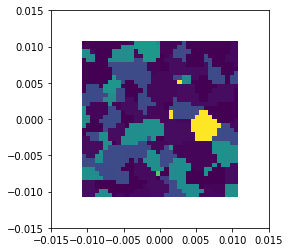

In [5]:
v0Arr=np.linspace(-199.1,-200.9,num=50)
v0Arr=[-200]
meanList=[]
for v0 in v0Arr:
    def wrap(y,z):
        val=[]
        #pArr=np.linspace(-3.0,3.0,num=10)
        #for py in pArr:
        #    for pz in pArr:
        #        val.append(func(y,z,v0,py,pz))
        return func(y,z,v0,0.0,0.0)#np.nanmean(np.asarray(val))

    bounds=np.asarray([(-1.0,1.0),(-1.0,1.0)])*15e-3
    plotxArr=np.linspace(bounds[0][0],bounds[0][1],num=50)
    plotyArr = np.linspace(bounds[1][0], bounds[1][1], num=50)
    image=np.empty((plotxArr.shape[0],plotyArr.shape[0]))
    for i in range(plotxArr.shape[0]):
        for j in range(plotyArr.shape[0]):
            image[j,i]=wrap(plotxArr[i],plotyArr[j])

    image=np.flip(image,axis=0)
    extent=[bounds[0][0],bounds[0][1],bounds[1][0],bounds[1][1]]
    meanList.append(np.nanmean(image))
    print(v0,np.nanmean(image),np.nanmax(image),np.nanmin(image))
    plt.imshow(image,extent=extent)
    plt.show()

In [5]:
image

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [6]:
(3**4/500)**.25

0.6344227580643385